In [5]:
# This code uses python to set up a perceptron to achieve supervised learning of binary classifiers.
# data from file:'./Iris-setosa'.
# created by Sunsky
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np

In [6]:
class Perceptron(object):
    
    def __init__(self,eta=0.1,iterations=10,random_state = 1,file_path = 'iris.data'):
        self.eta = eta
        self.file_path = file_path
        self.interations = iterations
        self.random_state = random_state
    
    def GetData(self):
        df = pd.read_csv(self.file_path,header=None)
        X = df.iloc[0:100,[0,2]].values
        y = df.iloc[0:100,4].values
        y = np.where(y == 'Iris-setosa',-1,1)
        self.X = X
        self.y = y
        return self
        
    def InitializeWeight(self):
#         Container for the slow Mersenne Twister pseudo-random number generator
        rs = np.random.RandomState(self.random_state)
        self.WeightArray = rs.normal(loc = 0.0,scale = 0.01,size = 1 + self.X.shape[1] )
        return self
    
    def NetInputFunction(self,x):
#         To get the input value from X and weight
        return np.dot(x,self.WeightArray[1:]) + 1 * self.WeightArray[0]
    
    def ActivationFunction(self,x):
#         To activate the input value by activation funtion    
        return np.where(self.NetInputFunction(x) >= 0,1,-1)
        
    def Learn(self):
        self.errorList = []
        for i in range(self.interations):
            error = 0
            for Xi,yi in zip(self.X,self.y):
#                 !!!wrong code becase it does not update the weights simultaneously,Sunsky,2021/7/9.
#                 self.WeightArray[2] += self.eta*(yi-self.ActivationFunction(Xi))*Xi[1]
#                 self.WeightArray[1] += self.eta*(yi-self.ActivationFunction(Xi))*Xi[0]
#                 self.WeightArray[0] += self.eta*(yi-self.ActivationFunction(Xi))*1
#                 error += int(self.eta*(yi-self.ActivationFunction(Xi)) != 0.0)
#                 !!!wrong code becase it does not update the weights simultaneously,Sunsky,2021/7/9.
                update = self.eta*(yi-self.ActivationFunction(Xi))
                self.WeightArray[0] += update*1
                self.WeightArray[1] += update*Xi[0]
                self.WeightArray[2] += update*Xi[1]
                error += int(update != 0.0)
            self.errorList.append(error)
        return self

In [7]:
def PlotDesicionRegions(X,y,classifier,resolustion = 0.02):
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolustion),
                          np.arange(x2_min,x2_max,resolustion))
    xy = np.array([xx1.ravel(),xx2.ravel()]).T 
    pridcited_xy = classifier.ActivationFunction(xy)
    z = pridcited_xy.reshape(xx1.shape)
    cmap = ListedColormap(['red','blue'])
    plt.figure(figsize=(8,6),dpi=80)
    plt.contourf(xx1,xx2,z,alpha = 0.6,cmap = cmap)
    plt.scatter(X[0:50,0],X[0:50,1],c='red',marker='o',label='Iris-setosa')
    plt.scatter(X[50:100,0],X[50:100,1],c='blue',marker='x',label='Iris-versicolor')
    plt.xlabel("sepal length [cm] ")
    plt.ylabel("petal length [cm] ")
    plt.legend()
    plt.show()

def PlotErrorLine(errorList):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(range(1,len(errorList)+1),errorList,color='purple',marker = 'o')
    plt.xlabel('Interation')
    plt.ylabel('Error')
    plt.title('Error and Epochs')
    plt.show()

<IPython.core.display.Javascript object>


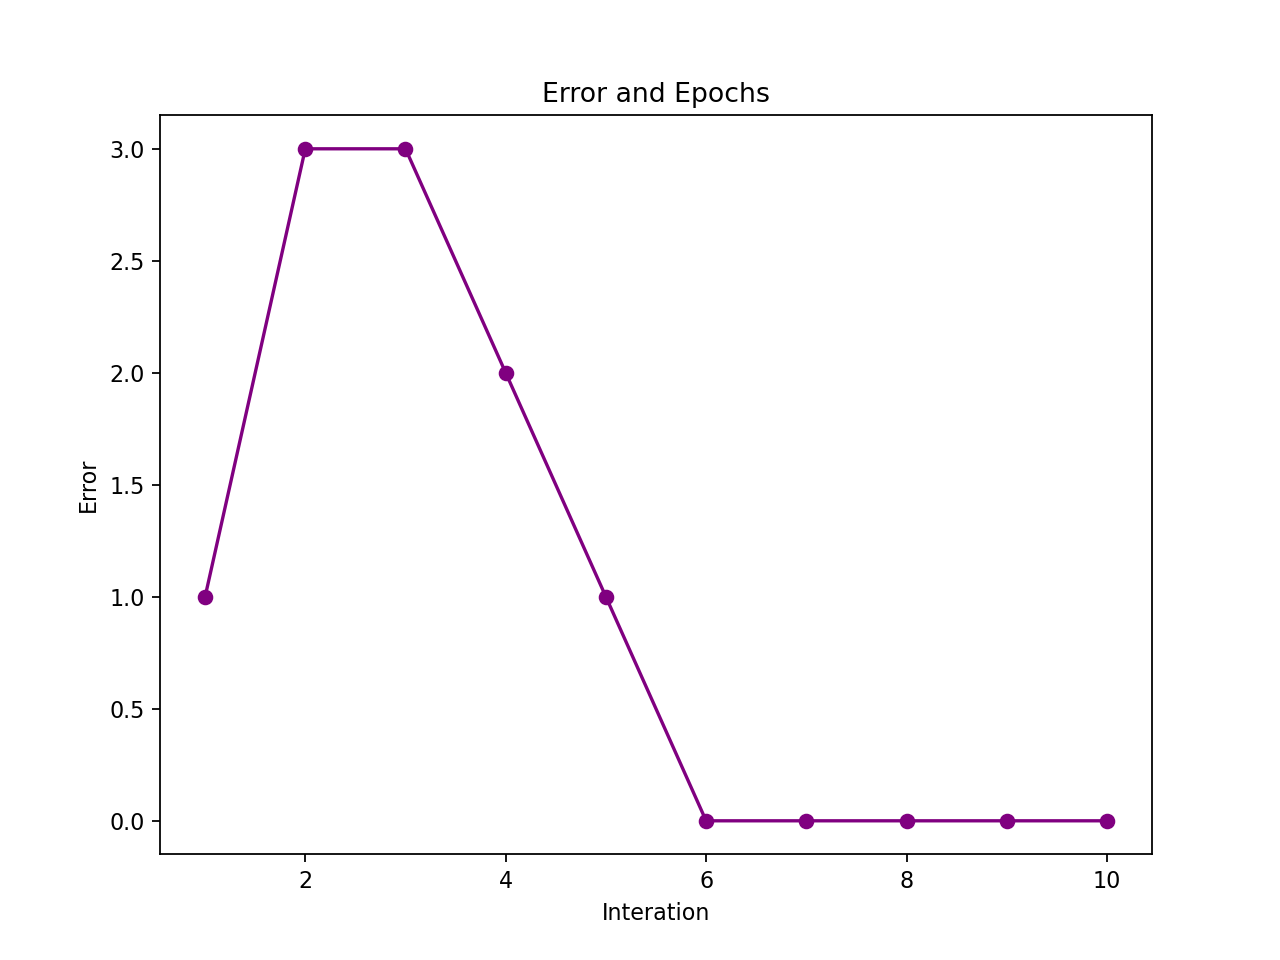

<IPython.core.display.Javascript object>


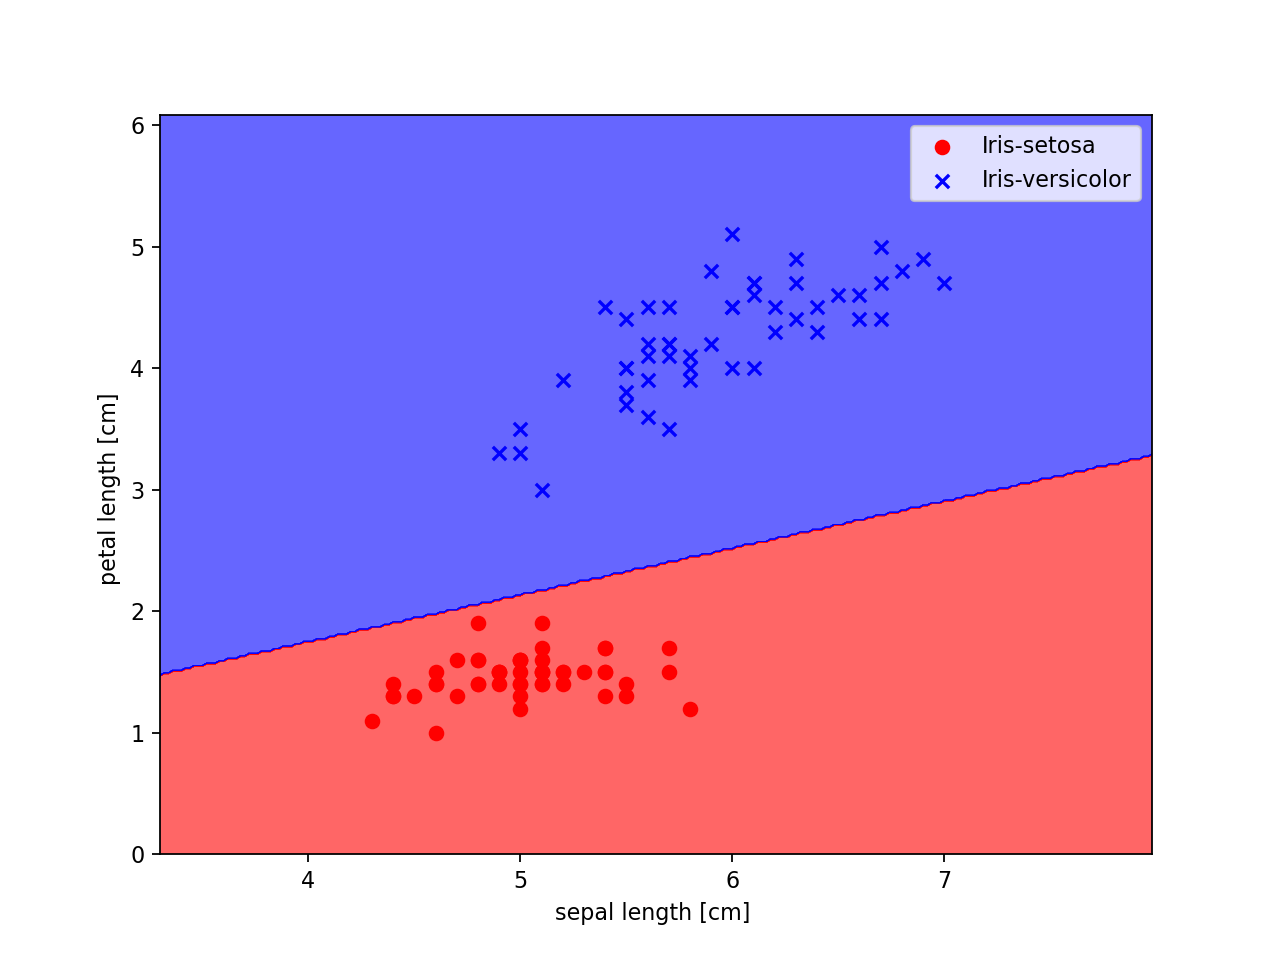

In [8]:
if __name__ == '__main__':
    #First initialize an object
    perceptron = Perceptron()
    #Then read the data
    perceptron.GetData()
    #Initialize weightArray using normal dittribution
    perceptron.InitializeWeight()
    #Learn!
    perceptron.Learn()
    PlotErrorLine(perceptron.errorList)
    PlotDesicionRegions(perceptron.X,perceptron.y,perceptron) 